In [11]:
import os
import sys
from scgt import GeoTiff
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/ecoscape-connectivity/')
from EcoLinker.EcoLinker.restorationOptimizer import restorationOptimizer, defecitRestoration, noisyDefecitRestoration, utopianRestoration, lowResDefecitRestoration, lowResProbablisticDefecitRestoration
from ecoscape_connectivity_local import repopulation, util
import matplotlib.pyplot as plt
# import ecoscape_connectivity
from scgt import GeoTiff, Tile
import numpy as np
import torch
import rasterio

In [12]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "smol/hab_smol.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "smol/restored_ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop.tif")
LOW_RES_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/scaled_repop.tif")
NOISY_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_noisy.tif")
UTOPIAN_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_utopian.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol/grad.tif")
LOW_RES_FLOW_PATH = os.path.join(DATA_PATH, "smol/scaled_grad.tif")
NOISY_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_noisy.tif")
UTOPIAN_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_utopian.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_after_restoration.tif")
DEATH_PATH = os.path.join(DATA_PATH, "smol/death.tif")

RESISTANCE_PATH = os.path.join(DATA_PATH, "smol/resistance.tif")
LOW_RES_RESISTANCE_PATH = os.path.join(DATA_PATH, "smol/scaled_resistance.tif")
LOW_RES_RESTORED_RESISTANCE_PATH = os.path.join(DATA_PATH, "smol/scaled_resistance.tif")
LOW_RES_HABITAT_PATH = os.path.join(DATA_PATH, "smol/scaled_hab_smol.tif")
SCALED_RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/scaled_repop_after_restoration.tif")
SCALED_RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol/scaled_flow_after_restoration.tif")
LOW_RES_DEATH_PATH = os.path.join(DATA_PATH, "smol/scaled_death.tif")

defecitOptimizer = defecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50)
noisyOptimizer = noisyDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, NOISY_CONNECTIVITY_PATH, NOISY_FLOW_PATH)
utopianOptimizer = utopianRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, UTOPIAN_CONNECTIVITY_PATH, UTOPIAN_FLOW_PATH, permiability=1.0)

In [4]:
defecitOptimizer.run_connectivity()
permiability_restored = defecitOptimizer.restore()
defecitOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {defecitOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {defecitOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {defecitOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 4040
Permiability Restored: 36.41313868702188
Percent connectivity changed: 0.00122998720995973%
Connectivity/permiability_restored: 110.9489636343793


In [13]:
lowResDefecitRestoration50 = lowResDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_DEATH_PATH, PERMEABILITY_PATH, 2, 2, 50)

lowResDefecitRestoration50.run_connectivity()
permiability_restored = lowResDefecitRestoration50.restore()
lowResDefecitRestoration50.run_connectivity(restored=True)
print(f"Delta connectivity: {lowResDefecitRestoration50.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResDefecitRestoration50.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResDefecitRestoration50.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 6456
Permiability Restored: 19.854481751824824
Percent connectivity changed: 0.002397191988120978%
Connectivity/permiability_restored: 325.1658784499187


In [15]:
print(lowResDefecitRestoration50.changed_pixels)

{(88, 146): 28, (88, 147): 36, (89, 146): 32, (89, 147): 33, (90, 152): 29, (90, 153): 27, (91, 152): 29, (91, 153): 0, (232, 28): 26, (232, 29): 0, (233, 28): 31, (233, 29): 28, (214, 186): 31, (214, 187): 28, (215, 186): 13, (215, 187): 11, (142, 184): 0, (142, 185): 32, (143, 184): 16, (143, 185): 27, (220, 198): 9, (220, 199): 31, (221, 198): 0, (221, 199): 32, (232, 24): 35, (232, 25): 35, (233, 24): 0, (233, 25): 0, (144, 86): 17, (144, 87): 17, (145, 86): 17, (145, 87): 17, (164, 104): 17, (164, 105): 17, (165, 104): 17, (165, 105): 17, (232, 26): 35, (232, 27): 32, (233, 26): 0, (233, 27): 0, (192, 174): 16, (192, 175): 17, (193, 174): 17, (193, 175): 16, (174, 160): 16, (174, 161): 16, (175, 160): 17, (175, 161): 17, (142, 190): 0, (142, 191): 0, (143, 190): 33, (143, 191): 33}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

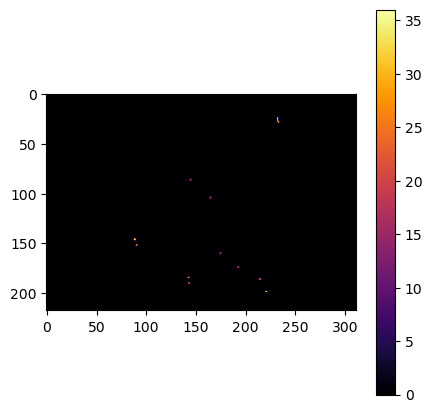

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

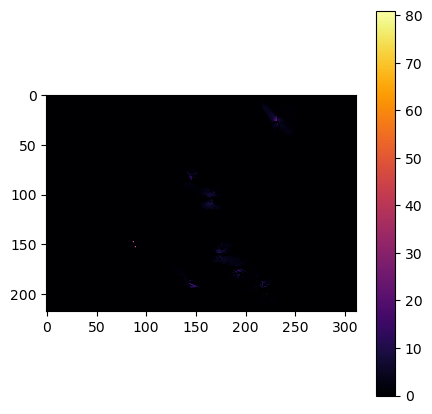

In [17]:
CHANGED_TERRAIN = os.path.join(DATA_PATH, "smol/changed_low_res_terrain_50.tif")

lowResDefecitRestoration50.paint_changed_terrain_geotiff(CHANGED_TERRAIN)

with GeoTiff.from_file(CHANGED_TERRAIN) as changed_terrain:
    changed_terrain.draw_geotiff()

CONNECTIVITY_DIFF = os.path.join(DATA_PATH, "smol/low_res_connectivity_diff_50.tif")
lowResDefecitRestoration50.get_connectivity_difference_tif(CONNECTIVITY_DIFF)
with GeoTiff.from_file(CONNECTIVITY_DIFF) as connectivity_diff:
    connectivity_diff.draw_geotiff()

lowResDefecitRestoration with 100 px

In [18]:
lowResDefecitRestoration100 = lowResDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_DEATH_PATH, PERMEABILITY_PATH, 2, 2, 100)

lowResDefecitRestoration100.run_connectivity()
permiability_restored = lowResDefecitRestoration100.restore()
lowResDefecitRestoration100.run_connectivity(restored=True)
print(f"Delta connectivity: {lowResDefecitRestoration100.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResDefecitRestoration100.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResDefecitRestoration100.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 9763
Permiability Restored: 28.696175182481824
Percent connectivity changed: 0.0036251216511810885%
Connectivity/permiability_restored: 340.2195567150017


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

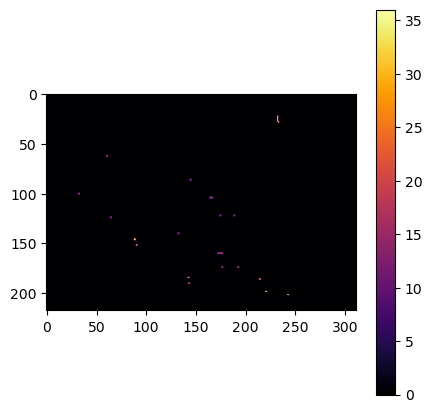

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

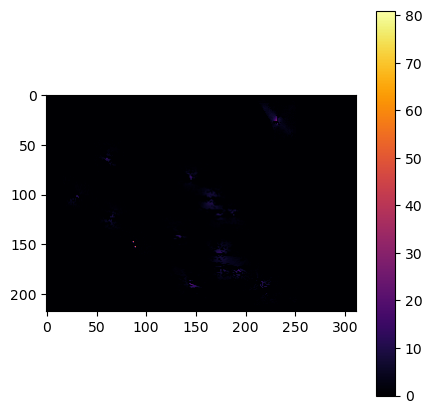

In [19]:
CHANGED_TERRAIN = os.path.join(DATA_PATH, "smol/changed_low_res_terrain_100.tif")

lowResDefecitRestoration100.paint_changed_terrain_geotiff(CHANGED_TERRAIN)

with GeoTiff.from_file(CHANGED_TERRAIN) as changed_terrain:
    changed_terrain.draw_geotiff()

CONNECTIVITY_DIFF = os.path.join(DATA_PATH, "smol/low_res_connectivity_diff_100.tif")
lowResDefecitRestoration100.get_connectivity_difference_tif(CONNECTIVITY_DIFF)
with GeoTiff.from_file(CONNECTIVITY_DIFF) as connectivity_diff:
    connectivity_diff.draw_geotiff()

In [20]:
lowResDefecitRestoration250 = lowResDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_DEATH_PATH, PERMEABILITY_PATH, 2, 2, 250)

lowResDefecitRestoration250.run_connectivity()
permiability_restored = lowResDefecitRestoration250.restore()
lowResDefecitRestoration250.run_connectivity(restored=True)
print(f"Delta connectivity: {lowResDefecitRestoration250.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResDefecitRestoration250.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResDefecitRestoration250.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 19583
Permiability Restored: 45.0529927007302
Percent connectivity changed: 0.007271408101513803%
Connectivity/permiability_restored: 434.6659084354813


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

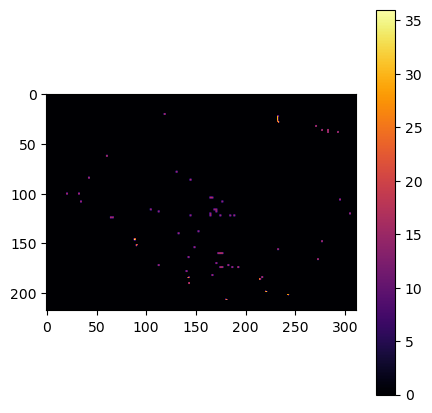

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

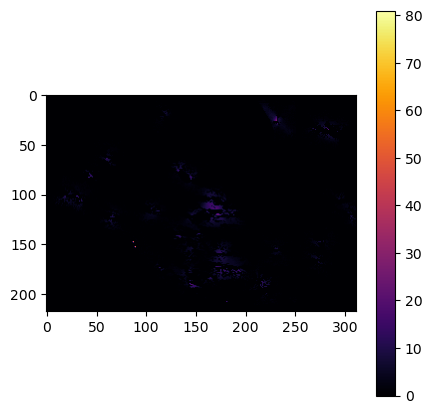

In [21]:
CHANGED_TERRAIN = os.path.join(DATA_PATH, "smol/changed_low_res_terrain_250.tif")

lowResDefecitRestoration250.paint_changed_terrain_geotiff(CHANGED_TERRAIN)

with GeoTiff.from_file(CHANGED_TERRAIN) as changed_terrain:
    changed_terrain.draw_geotiff()

CONNECTIVITY_DIFF = os.path.join(DATA_PATH, "smol/low_res_connectivity_diff_250.tif")
lowResDefecitRestoration250.get_connectivity_difference_tif(CONNECTIVITY_DIFF)
with GeoTiff.from_file(CONNECTIVITY_DIFF) as connectivity_diff:
    connectivity_diff.draw_geotiff()

In [22]:
lowResDefecitRestoration500 = lowResDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_DEATH_PATH, PERMEABILITY_PATH, 2, 2, 500)

lowResDefecitRestoration500.run_connectivity()
permiability_restored = lowResDefecitRestoration500.restore()
lowResDefecitRestoration500.run_connectivity(restored=True)
print(f"Delta connectivity: {lowResDefecitRestoration500.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {lowResDefecitRestoration500.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {lowResDefecitRestoration500.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

Delta connectivity: 31969
Permiability Restored: 73.35576642471528
Percent connectivity changed: 0.011870481825935494%
Connectivity/permiability_restored: 435.80759302419193


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

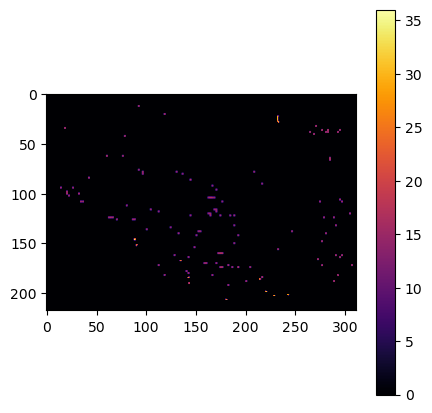

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

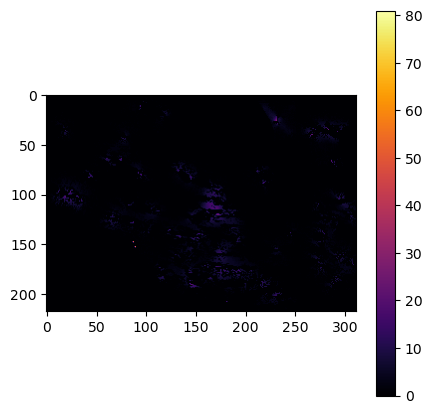

In [23]:
CHANGED_TERRAIN = os.path.join(DATA_PATH, "smol/changed_low_res_terrain_500.tif")

lowResDefecitRestoration500.paint_changed_terrain_geotiff(CHANGED_TERRAIN)

with GeoTiff.from_file(CHANGED_TERRAIN) as changed_terrain:
    changed_terrain.draw_geotiff()

CONNECTIVITY_DIFF = os.path.join(DATA_PATH, "smol/low_res_connectivity_diff_500.tif")
lowResDefecitRestoration500.get_connectivity_difference_tif(CONNECTIVITY_DIFF)
with GeoTiff.from_file(CONNECTIVITY_DIFF) as connectivity_diff:
    connectivity_diff.draw_geotiff()

In [3]:
scaledProbablisticDefecitRestoration = lowResProbablisticDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, RESTORED_CONNECTIVITY_PATH, FLOW_PATH, RESTORED_FLOW_PATH, DEATH_PATH, LOW_RES_DEATH_PATH, PERMEABILITY_PATH, 2, 2, 50)

scaledProbablisticDefecitRestoration.run_connectivity()
permiability_restored = scaledProbablisticDefecitRestoration.restore()
scaledProbablisticDefecitRestoration.run_connectivity(restored=True)
print(f"Delta connectivity: {scaledProbablisticDefecitRestoration.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {scaledProbablisticDefecitRestoration.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {scaledProbablisticDefecitRestoration.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


[13806  5617  2501 10574  9169  3126  8246  2829  2027 13175  1095  8520
 14312]
x: 88, y: 78: 41
x: 176, y: 156: 12
x: 176, y: 157: 15
x: 177, y: 156: 14
x: 177, y: 157: 0
x: 36, y: 1: 33
x: 72, y: 2: 15
x: 72, y: 3: 13
x: 73, y: 2: 0
x: 73, y: 3: 5
x: 16, y: 5: 40
x: 32, y: 10: 10
x: 32, y: 11: 13
x: 33, y: 10: 9
x: 33, y: 11: 8
x: 67, y: 122: 21


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 500x500 with 0 Axes>

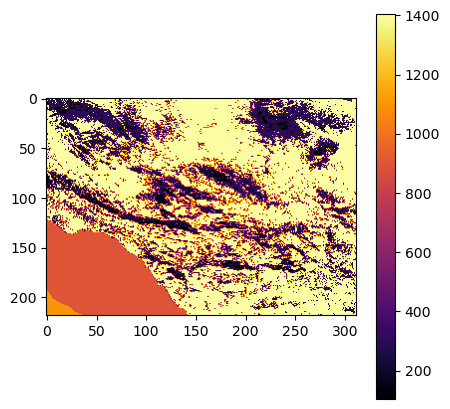

1


In [5]:
with GeoTiff.from_file(scaledProbablisticDefecitRestoration.terrain_fn) as restored_terr:
    restored_terr.draw_geotiff()
    print(restored_terr.bands)

In [9]:
# paint changed terrain pixels
CHANGED_TERRAIN = os.path.join(DATA_PATH, "smol/changed_terrain.tif")
defecitOptimizer.paint_changed_terrain_geotiff(CHANGED_TERRAIN)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [10]:
# view diff of before and after
CONNECTIVITY_DIFF = os.path.join(DATA_PATH, "smol/connectivity_diff.tif")
defecitOptimizer.get_connectivity_difference_tif(CONNECTIVITY_DIFF)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [5]:
noisyOptimizer.run_connectivity()
noisyOptimizer.run_noisy_connectivity()
permiability_restored = noisyOptimizer.restore()
noisyOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {noisyOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {noisyOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {noisyOptimizer.get_delta_connectivity()/permiability_restored}")

run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LA

run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1365
Permiability Restored: 36.43083211724087
Percent connectivity changed: 0.0004155773617809484%
Connectivity/permiability_restored: 37.46826302531845


In [5]:
# utopian restoration
utopianOptimizer.run_connectivity()
utopianOptimizer.run_utopian_connectivity()
permiability_restored = utopianOptimizer.restore()
utopianOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {utopianOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {utopianOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {utopianOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(19, 4): 62, (235, 14): 60, (233, 23): 60, (228, 11): 59, (233, 13): 58, (230, 15): 58, (223, 13): 57, (230, 28): 57, (224, 12): 57, (226, 13): 57, (226, 14): 57, (119, 100): 57, (230, 16): 57, (226, 10): 57, (242, 164): 56, (230, 14): 56, (223, 10): 56, (182, 162): 56, (231, 12): 56, (245, 17): 56, (238, 13): 56, (229, 15): 56, (229, 14): 56, (122, 97): 56, (243, 159): 56, (121, 98): 56, (235, 28): 56, (195, 87): 56, (239, 23): 56, (283, 50): 56, (50, 97): 55, (209, 143): 55, (231, 17): 55, (156, 166): 55, (224, 11): 55, (223, 11): 55, (284, 51): 55, (238, 22): 55, (238, 24): 55, (227, 12): 55, (238, 23): 55, (10, 4): 55, (237, 23): 55, (225, 14): 54, (162, 162): 54, (48, 112): 54, (181, 161): 54, (175, 155): 54, (231, 15): 54, (242, 19): 54}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1118
Permiability Restored: 31.91635036510222
Percent connectivity changed: 0.0003403776486967768%
Connectivity/permiability_restored: 35.02906777281267


In [4]:
# paint changed terrain pixels
diff = utopianOptimizer.get_flow_diff()
highest_diff = utopianOptimizer.get_highest_diff_pixels(diff)
CHANGED_TERRAIN = os.path.join(DATA_PATH, "smol/changed_utopian_terrain.tif")
utopianOptimizer.paint_changed_terrain_geotiff(CHANGED_TERRAIN, highest_diff)

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [4]:
# utopian restoration
utopianOptimizer.run_connectivity()
utopianOptimizer.run_utopian_connectivity()
permiability_restored = utopianOptimizer.restore(weighted=True)
utopianOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {utopianOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {utopianOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {utopianOptimizer.get_delta_connectivity()/permiability_restored}")

run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(235, 14): 60.0, (228, 11): 59.0, (230, 15): 58.0, (233, 13): 58.0, (226, 14): 57.0, (226, 13): 57.0, (223, 13): 57.0, (226, 10): 57.0, (230, 16): 57.0, (224, 12): 57.0, (230, 28): 56.99980097227101, (243, 159): 56.0, (231, 12): 56.0, (229, 14): 56.0, (230, 14): 56.0, (182, 162): 56.0, (242, 164): 56.0, (229, 15): 56.0, (231, 17): 55.0, (224, 11): 55.0, (227, 12): 55.0, (156, 166): 55.0, (50, 97): 55.0, (225, 14): 54.0, (261, 30): 54.0, (152, 160): 54.0, (145, 168): 54.0, (227, 11): 54.0, (226, 11): 54.0, (225, 11): 54.0, (225, 10): 54.0, (224, 10): 54.0, (175, 155): 54.0, (224, 9): 54.0, (227, 16): 54.0, (176, 154): 53.0, (243, 150): 53.0, (227, 15): 53.0, (146, 168): 53.0, (99, 151): 53.0, (147, 166): 53.0, (57, 126): 53.0, (110, 159): 53.0, (141, 177): 53.0, (58, 125): 53.0, (233, 23): 52.284425220310084, (160, 154): 52.0, (59, 129): 52.0, (56, 129): 52.0, (67, 130): 52.0}
run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036,

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1789
Permiability Restored: 49.63953284685402
Percent connectivity changed: 0.0005446651283707815%
Connectivity/permiability_restored: 36.03982345118666


In [7]:
noisyOptimizer.run_connectivity()

# results converge to denoised output as randomization decreases
for rand in [1, 25, 50, 75, 100]:
    print(f"rand divisor = {rand}")
    noisyOptimizer = noisyDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, NOISY_CONNECTIVITY_PATH, NOISY_FLOW_PATH, rand_divisor=rand)
    noisyOptimizer.run_noisy_connectivity()
    permiability_restored = noisyOptimizer.restore()
    noisyOptimizer.run_connectivity(restored=True)
    print(f"Delta connectivity: {utopianOptimizer.get_delta_connectivity()}")
    print(f"Permiability Restored: {permiability_restored}")
    print(f"Percent connectivity changed: {utopianOptimizer.get_connectivity_percent_changed()}%")
    print(f"Connectivity/permiability_restored: {utopianOptimizer.get_delta_connectivity()/permiability_restored}")

run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


rand divisor = 1


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1428
Permiability Restored: 35.98207299360583
Percent connectivity changed: 0.0004347578554016076%
Connectivity/permiability_restored: 39.68642941316254
rand divisor = 25


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1444
Permiability Restored: 36.190773723080284
Percent connectivity changed: 0.0004396290918766956%
Connectivity/permiability_restored: 39.89967197300079
rand divisor = 50


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1342
Permiability Restored: 36.51783941651094
Percent connectivity changed: 0.0004085749593480094%
Connectivity/permiability_restored: 36.74916209290402
rand divisor = 75


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1670
Permiability Restored: 36.51783941651094
Percent connectivity changed: 0.0005084353070873141%
Connectivity/permiability_restored: 45.73107354333064
rand divisor = 100


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 1350
Permiability Restored: 36.43083211724087
Percent connectivity changed: 0.0004110105775855534%
Connectivity/permiability_restored: 37.056523871194074
